In [1]:
#Installing the required Python libraries
!pip install pandas nltk textblob transformers torch

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached transformers-4.46.2-py3-none-any.whl.metadata (44 kB)
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
  Using cached tokenizers-0.20.3-cp312-none-win_amd64.whl.metadata (6.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Using cached transformers-4.46.2-py3-none-any.whl (10.0 MB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
Using cached safetensors-0.4.5-cp312-none-win_amd64.whl (286 kB)
Us

In [1]:
import pandas as pd

In [2]:
# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_Instagram-comments3.csv')[['Lemmatized_Comments']]

In [3]:
#print(df.head())

In [4]:
#Classify Question Marks
import re

# Define rules for curiosity patterns
def is_curiosity(comment):
    
    curiosity_keywords = ['right', 'gluten']
    
   # Check if the comment contains question marks and any curiosity keywords
    if '?' in comment:
        lower_comment = comment.lower() # work on single string
        # Match curiosity-related question structures
        return any(phrase in lower_comment for phrase in curiosity_keywords)
    
    return False
    
## Apply to the dataset
df['is_curiosity'] = df['Lemmatized_Comments'].apply(is_curiosity)
    

In [5]:
# Apply the curiosity detection function
df['is_curiosity'] = df['Lemmatized_Comments'].apply(is_curiosity)

# Filter rows where 'is_curiosity' is True
curiosity_comments = df[df['is_curiosity']]

# Print the original comments marked as curiosity
print("Comments identified as curiosity-related:")
print(curiosity_comments['Lemmatized_Comments'])  

# print a sample for review
print("\nSample of curiosity-related comments:")
print(curiosity_comments[['Lemmatized_Comments', 'is_curiosity']].head(10))

Comments identified as curiosity-related:
412         right ? ? love
414    julep gluten free ?
Name: Lemmatized_Comments, dtype: object

Sample of curiosity-related comments:
     Lemmatized_Comments  is_curiosity
412       right ? ? love          True
414  julep gluten free ?          True


In [6]:
#Classify Question Marks
def is_trust(comment):
    trust_keywords = ['ended', 'stock', 'wholesale', 'buy', 'purchase', 'online', 'sustainable ethical', 'back', 'payment']
   
 # Check if the comment contains question marks and any trust keywords
    if '?' in comment:
        lower_comment = comment.lower() # work on single string
        # Match trust-related question structures
        return any(phrase in lower_comment for phrase in trust_keywords)
    
    return False
    

df['is_trust'] = df['Lemmatized_Comments'].apply(is_trust)



In [7]:
# Apply the trust detection function
df['is_trust'] = df['Lemmatized_Comments'].apply(is_trust)

# Filter rows where 'is_trust' is True
trust_comments = df[df['is_trust']]

# Print the original comments marked as trust
print("Comments identified as trust-related:")
print(trust_comments['Lemmatized_Comments'])  

# print a sample for reviewing
print("\nSample of trust-related comments:")
print(trust_comments[['Lemmatized_Comments', 'is_trust']].head(10))

Comments identified as trust-related:
19                                     will back stock ?
29                                           wholesale ?
79                                     will back stock ?
144     okay definitely need hand cream best place buy ?
154    happen isle wight buy mint deodorant stick ple...
199    wonder would able purchase reliable toothbrush...
201               love tooth powder range store online ?
229         hiya stock bottle case dont bring enough ? ?
253         think sustainable ethical beauty brand ? tag
346                                             back ? ?
399       charge card but say payment couldnt verify ? ?
Name: Lemmatized_Comments, dtype: object

Sample of trust-related comments:
                                   Lemmatized_Comments  is_trust
19                                   will back stock ?      True
29                                         wholesale ?      True
79                                   will back stock ?      True

In [8]:
#Classify Question Marks
#combine filters
def classify_question(comment):
    if is_curiosity(comment):
        return 'Content'
    elif is_trust(comment):
        return 'Trust'
    elif '?' in comment:
        return 'Neutral'
    return 'None'

df['question_type'] = df['Lemmatized_Comments'].apply(classify_question)

In [9]:
# Split each entry in the 'Lemmatized_Comments' column into lists of words
df['Lemmatized_Comments'] = df['Lemmatized_Comments'].apply(lambda x: x.split() if isinstance(x, str) else x)

# Verify that each document is now a list of tokens
print(df['Lemmatized_Comments'].iloc[0])
print(type(df['Lemmatized_Comments'].iloc[0]))

['look', 'nourish', 'perfect', 'keep', 'lips', 'soft', 'cool']
<class 'list'>


In [10]:
# 1- Emotion Lexicon Analysis
#Use the NRC Emotion Lexicon for detecting emotions in the comments
from nltk.corpus import wordnet
from collections import defaultdict
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
#Updated Code to Handle Encoding
# Specify the file path
nrc_file_path = 'D:/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load NRC
#Emotion Lexicon with the correct encoding
emotion_dict = defaultdict(list)
try:
    with open(nrc_file_path, 'r', encoding='utf-8') as f:  # Try utf-8 first
        for line in f:
            word, emotion, presence = line.strip().split('\t')
            if int(presence) == 1:
                emotion_dict[word].append(emotion)
except UnicodeDecodeError:
    with open(nrc_file_path, 'r', encoding='latin-1') as f:  # Fall back to latin-1
        for line in f:
            word, emotion, presence = line.strip().split('\t')
            if int(presence) == 1:
                emotion_dict[word].append(emotion)

In [43]:
# Define a supplementary lexicon
supplementary_lexicon = {
    'great': ['joy'],
    'awesome': ['joy'],
    'amazing': ['joy'],
    'wow': ['joy'],
    'thank': ['trust'],
    'oh' : ['joy'],
    'hun' : ['joy'],
    'like' : ['joy'],
    'fantastic' : ['joy'],
    'stunning' : ['joy'],
    'ohh' : ['joy'],
    'ooh' : ['joy'],
    'ah' : ['joy'],
    'yahooo' : ['joy'],
    'yay' : ['joy'],
    'omg' : ['joy'],
    'yes' : ['trust'],
    'best' : ['trust'],
    'cutie' : ['joy'],
    'nice' : ['joy'],
    'loveeee' : ['joy'],
    'loveee' : ['joy'],
    'talented' : ['trust'],
    'incredible' : ['joy'],
    'insightful' : ['trust'],
    'curious' : ['anticipation'],
    'not wait' : ['trust'],
    'cant wait' : ['trust'],
    'need' : ['curiosity'],
    'not help' : ['sadness'],
    'purchase' : ['trust'],
    'buy' : ['trust'],
    'leapingbunnycertified': ['trust'],
    'crueltyfree' : ['trust'],
    'naturalbeauty' : ['trust'],
    'zerowaste' : ['trust'],  
    'plasticfree' : ['trust'], 
    'lowwastelifestyle' : ['trust'], 
    'ecofriendly' : ['trust'], 
    'sustainable' : ['trust'],
    'gogreen' : ['trust'],
    'zerowastelifestyle' : ['trust'], 
    'wastefree' : ['trust'],
    'crueltyfree' : ['trust'],
    'vegan': ['trust'],
    'zerowastestore' : ['trust'], 
    'refillrevolution' : ['trust'],
    'refillablemakeup' : ['trust'], 
    'refillablecosmetics' : ['trust'], 
    'zerowastemakeup' : ['trust'],
    'zerowastecosmetics' : ['trust'],
    'lowwastemakeup' : ['trust'],
    'lowwastecosmetics' : ['trust'], 
    'refillableskincare' : ['trust'], 
    'zerowasteskincare' : ['trust'],
    'cleanbeauty' : ['trust'],
    'refillable' : ['trust'], 
    'sustainablemakeup' : ['trust'],
    'ecofriendlymakeup' : ['trust'],
    'lowwasteliving' : ['trust'],
    'zerowasteliving' : ['trust'], 
    'veganbeauty' : ['trust'],
    'refillablebeauty' : ['trust'], 
    'sustainablebeauty' : ['trust'], 
    'ecobeauty' : ['trust'], 
    'refill' : ['trust'],
    'sustainableliving' : ['trust'], 
    'consciousconsumer' : ['trust'],
    'organicskincare' : ['trust'],
    'sustainableskincare' : ['trust'],
    'preservativefree' : ['trust'],
    'palmoilfreeskincare' : ['trust'], 
    'fairtradeskincare' : ['trust'],
    'compostableskincare' : ['trust'],
    'compostablelipbalm' : ['trust'],
    'ecofriendlyskincare' : ['trust'],
    'crueltyfreeskincare' : ['trust'],
    'circularbeauty' : ['trust'],
    'ethical' : ['trust'],
    'natural' : ['trust'],
    'nowaste' : ['trust'],
    'sustainablepackaging' : ['trust'],
    'economiacircular' : ['trust'],
    'circularity' : ['trust'],
    'recycledmaterials' : ['trust'],
    'ecofriendlyproducts' : ['trust'],
    'ecofriendlyliving' : ['trust'],
    'sustainablebrand' : ['trust'],
    'sustainablebusiness' : ['trust'],
    'sustainabilitymatters' : ['trust'],
    'preserve' : ['trust'],
    'climate' : ['trust'],
    'environment' : ['trust'],
    'earthsustainable' : ['trust'],
    'compostable' : ['trust'],
    'none plastic' : ['trust'],
    'sustainability' : ['trust'],
    'reuse' : ['trust'],
    'reusable' : ['trust'],
    'support' : ['trust'],
    'conservation' : ['trust'],
    'but' : ['sadness'],
    'thanks': ['trust']

}

# Combine with the NRC Lexicon
for word, emotions in supplementary_lexicon.items():
    if word not in emotion_dict:
        emotion_dict[word] = emotions

In [44]:
# Analyze emotions in each comment
def get_emotions(Lemmatized_Comments):
    emotions = []
    for token in Lemmatized_Comments:
        token_emotions = emotion_dict.get(token.lower(), [])
        emotions.extend(token_emotions)
    return emotions

df['lexicon_emotions'] = df['Lemmatized_Comments'].apply(get_emotions)


In [45]:
# Summarize emotions
df['lexicon_emotions_summary'] = df['lexicon_emotions'].apply(lambda x: {emotion: x.count(emotion) for emotion in set(x)})

In [46]:
# Preview emotion analysis
#print(df[['Lemmatized_Comments', 'lexicon_emotions', 'lexicon_emotions_summary']].head())

In [47]:
# Mapping NRC emotions to custom categories
emotion_mapping = {
    'joy': 'Joyful', # Map joy to Joyful
    'surprise': 'Joyful', # Map surprise to Joyful
    'trust': 'Trust',
    'positive': 'Joyful', # Map trust to Joyful
    'gratitude': 'Trust', # Map gratitude to Trust
    'negative': 'Anger',  # Map all negative to Anger
    'sadness': 'Disappointment',  # Sadness becomes Disappointment
    'anger': 'Anger',
    'fear': 'Disappointment',  # Fear becomes Disappointment
    'anticipation': 'Neutral',  # anticipation as Neutral
    'disgust': 'Anger',  # Map disgust to Anger
    'neutral' : 'Neutral', 
    'curiosity' : 'Content' # Map curiosity to Content
    
}

In [48]:
#Apply Mapping Only to Existing Emotions
# Function to map emotions based on the dictionary
def map_emotions(emotion_list, mapping):
    if not emotion_list:  # If no emotions detected, return as is
        return emotion_list
    return [mapping.get(emotion, emotion) for emotion in emotion_list] 

In [49]:
# Apply the mapping
df['mapped_emotions'] = df['lexicon_emotions_summary'].apply(lambda x: map_emotions(x, emotion_mapping))

# Display the results
print(df[['Lemmatized_Comments', 'lexicon_emotions_summary', 'mapped_emotions']])

                                  Lemmatized_Comments  \
0    [look, nourish, perfect, keep, lips, soft, cool]   
1                                            [pretty]   
2                                      [labour, love]   
3                                               [wow]   
4                                 [oh, soooo, pretty]   
..                                                ...   
411                                [all, best, brand]   
412                               [right, ?, ?, love]   
413                                           [woooo]   
414                          [julep, gluten, free, ?]   
415              [leapingbunnycertified, crueltyfree]   

                              lexicon_emotions_summary  \
0    {'trust': 1, 'anticipation': 1, 'joy': 1, 'pos...   
1    {'trust': 1, 'anticipation': 1, 'joy': 1, 'pos...   
2                            {'positive': 1, 'joy': 1}   
3                                           {'joy': 1}   
4    {'trust': 1, 'antici

In [50]:
# Function to combine mapped emotions and question type with specific conditions
def combine_emotions_and_questions(row):
    # Only consider question_type if it's 'Curiosity' or 'Anticipation'
    if row['question_type'] in ['Content', 'Trust', 'Neutral']:
        # Include mapped emotions if present
        if row['mapped_emotions']:
            return f" {', '.join(row['mapped_emotions'])} , {row['question_type']}"
        else:
            return row['question_type']
    # If question_type is not 'Curiosity' or 'Anticipation', only include mapped emotions
    elif row['mapped_emotions']:
        return f" {', '.join(row['mapped_emotions'])}"
    # If neither condition is met, return a default message
    else:
        return {}

In [51]:
#Apply this function to create the new column
df['combined_analysis0'] = df.apply(combine_emotions_and_questions, axis=1)

# Display the results
print(df[['Lemmatized_Comments', 'lexicon_emotions_summary', 'mapped_emotions', 'combined_analysis0']])

                                  Lemmatized_Comments  \
0    [look, nourish, perfect, keep, lips, soft, cool]   
1                                            [pretty]   
2                                      [labour, love]   
3                                               [wow]   
4                                 [oh, soooo, pretty]   
..                                                ...   
411                                [all, best, brand]   
412                               [right, ?, ?, love]   
413                                           [woooo]   
414                          [julep, gluten, free, ?]   
415              [leapingbunnycertified, crueltyfree]   

                              lexicon_emotions_summary  \
0    {'trust': 1, 'anticipation': 1, 'joy': 1, 'pos...   
1    {'trust': 1, 'anticipation': 1, 'joy': 1, 'pos...   
2                            {'positive': 1, 'joy': 1}   
3                                           {'joy': 1}   
4    {'trust': 1, 'antici

In [52]:
# Inspect the data type of the column
print(df['combined_analysis0'].apply(type).value_counts())

# Print sample rows with their type
print(df['combined_analysis0'].head(10))

combined_analysis0
<class 'str'>     380
<class 'dict'>     36
Name: count, dtype: int64
0                       Trust, Neutral, Joyful, Joyful
1                       Trust, Neutral, Joyful, Joyful
2                                       Joyful, Joyful
3                                               Joyful
4                       Trust, Neutral, Joyful, Joyful
5                                       Joyful, Joyful
6     Joyful, Disappointment, Joyful, Joyful, Neutr...
7                                       Joyful, Joyful
8                       Trust, Neutral, Joyful, Joyful
9                                                Trust
Name: combined_analysis0, dtype: object


In [53]:
# Function to normalize the column
def normalize_to_list(value):
    if isinstance(value, str):  # If value is a string, split it into a list
        return [item.strip() for item in value.split(',')]
    elif isinstance(value, dict):  # If value is a dictionary, extract the keys (or values if needed)
        return list(value.keys())
    else:  # If value is neither, return an empty list
        return []

# Normalize the column
df['normalized_analysis'] = df['combined_analysis0'].apply(normalize_to_list)


In [54]:
# Function to remove duplicates, normalize case, and trim whitespace
# Deduplication function
def remove_duplicates(emotions):
    if isinstance(emotions, list):
        return list(dict.fromkeys(emotions))  # Remove duplicates while preserving order
    return emotions

# Apply the deduplication function
df['NRC_analysis'] = df['normalized_analysis'].apply(remove_duplicates)

# Display the DataFrame to verify changes
print(df[['combined_analysis0', 'normalized_analysis', 'NRC_analysis']])

                  combined_analysis0               normalized_analysis  \
0     Trust, Neutral, Joyful, Joyful  [Trust, Neutral, Joyful, Joyful]   
1     Trust, Neutral, Joyful, Joyful  [Trust, Neutral, Joyful, Joyful]   
2                     Joyful, Joyful                  [Joyful, Joyful]   
3                             Joyful                          [Joyful]   
4     Trust, Neutral, Joyful, Joyful  [Trust, Neutral, Joyful, Joyful]   
..                               ...                               ...   
411                            Trust                           [Trust]   
412         Joyful, Joyful , Content         [Joyful, Joyful, Content]   
413                               {}                                []   
414                          Content                         [Content]   
415                            Trust                           [Trust]   

                 NRC_analysis  
0    [Trust, Neutral, Joyful]  
1    [Trust, Neutral, Joyful]  
2              

In [55]:
# Save emotion summaries to a CSV file
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\lexicon_emotions26_ins.csv', index=False)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each emotion in the 'NRC_analysis' column
emotion_counts = df['NRC_analysis'].explode().value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Removing unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Emotion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('nrc_emotion_analysis_plot.png')
plt.close()  # Close the plot display to save memory

# Display a success message
print("Bar chart for NRC analysis saved successfully as 'nrc_emotion_analysis_plot.png'.")


C:\Users\paris\AppData\Local\Temp\ipykernel_19420\1962586029.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart for NRC analysis saved successfully as 'nrc_emotion_analysis_plot.png'.


In [59]:
# 2- Emotion Analysis: Pre-trained Model Analysis

#Use a pre-trained transformer model (DistilBERT-based model) from the Hugging Face Transformers library:

from transformers import pipeline

# Load a pre-trained emotion classification model
emotion_pipeline = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion')

# Apply model to each comment
df['model_emotions'] = df['Lemmatized_Comments'].apply(lambda x: emotion_pipeline(x))

In [60]:
# Check the type of data in model_emotions
print(df['model_emotions'].apply(type).value_counts())

model_emotions
<class 'list'>    416
Name: count, dtype: int64


In [61]:
# Mapping for renaming emotions
emotion_rename_mapping = {
    'joy': 'Joyful', # Map joy to Joyful
    'surprise': 'Joyful', # Map surprise  to Joyful
    'trust': 'Trust',
    'positive': 'Joyful', # Map positive  to Joyful
    'gratitude': 'Trust', #Map  gratitude to Trust
    'negative': 'Anger',  # Map all negative to anger
    'sadness': 'Disappointment',  # Sadness becomes Disappointment
    'anger': 'Anger',
    'fear': 'Disappointment',  # Fear becomes Disappointment
    'anticipation': 'Neutral',  # anticipation as Neutral
    'disgust': 'Anger',  # Map disgust to Anger
    'neutral' : 'Neutral',
    'love': 'Trust', #Map love  to Trust
    'curiosity' : 'Content' #Map  curiosity to Content
}

# Function to rename and aggregate emotions
def rename_and_aggregate_emotions(emotion_list):
    if isinstance(emotion_list, list):
        renamed_emotions = {}
        for emotion_dict in emotion_list:
            if isinstance(emotion_dict, dict) and "label" in emotion_dict and "score" in emotion_dict:
                # Rename emotion based on mapping
                new_emotion = emotion_rename_mapping.get(emotion_dict["label"], emotion_dict["label"])
                # Aggregate scores for renamed emotions
                renamed_emotions[new_emotion] = renamed_emotions.get(new_emotion, 0) + emotion_dict["score"]
        return renamed_emotions
    return {}

# Apply the function to the column
df['renamed_emotions'] = df['model_emotions'].apply(rename_and_aggregate_emotions)

# Display the updated DataFrame
print(df[['model_emotions', 'renamed_emotions']])

                                        model_emotions  \
0    [{'label': 'anger', 'score': 0.60161292552948}...   
1      [{'label': 'joy', 'score': 0.9364343285560608}]   
2    [{'label': 'anger', 'score': 0.871733903884887...   
3    [{'label': 'surprise', 'score': 0.764474809169...   
4    [{'label': 'anger', 'score': 0.484315395355224...   
..                                                 ...   
411  [{'label': 'joy', 'score': 0.4438350796699524}...   
412  [{'label': 'anger', 'score': 0.604138970375061...   
413   [{'label': 'anger', 'score': 0.672214925289154}]   
414  [{'label': 'joy', 'score': 0.5126311779022217}...   
415  [{'label': 'joy', 'score': 0.6565280556678772}...   

                                      renamed_emotions  
0    {'Anger': 1.7223040461540222, 'Joyful': 2.9870...  
1                       {'Joyful': 0.9364343285560608}  
2    {'Anger': 0.8717339038848877, 'Trust': 0.91715...  
3                       {'Joyful': 0.7644748091697693}  
4    {'Anger': 1.0

In [62]:
print(df['Lemmatized_Comments'].apply(type).value_counts())  # Should mostly be <class 'str'>
print(df['renamed_emotions'].apply(type).value_counts())  

Lemmatized_Comments
<class 'list'>    416
Name: count, dtype: int64
renamed_emotions
<class 'dict'>    416
Name: count, dtype: int64


In [63]:
# Print unique types in the renamed_emotions column
print(df['renamed_emotions'].apply(type).value_counts())

# Print rows where renamed_emotions is not a dictionary
invalid_rows = df[df['renamed_emotions'].apply(lambda x: not isinstance(x, dict))]
print(invalid_rows[['Lemmatized_Comments', 'renamed_emotions']])

renamed_emotions
<class 'dict'>    416
Name: count, dtype: int64
Empty DataFrame
Columns: [Lemmatized_Comments, renamed_emotions]
Index: []


In [64]:
# Function to adjust detected emotions based on rules
def rule_based_emotion_adjustment(comment_words, emotion_scores):
    # Ensure inputs are valid
    if not isinstance(comment_words, list) or not isinstance(emotion_scores, dict):
        return emotion_scores

    # Example rule: Override anger if positive words are present
    positive_keywords = ['perfect', 'love', 'awesome', 'great', 'excellent', 'amazing', 'wow', 'oh', 'hun', 'like', 'fantastic', 'stunning', 'ohh', 'ooh', 'ah', 'yahooo', 'yay', 'omg',  'cutie', 'nice', 'loveeee', 'loveee', 'talented']
    if 'Anger' in emotion_scores and any(word in comment_words for word in positive_keywords):
        # Reduce anger and boost joy
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Joyful'] = emotion_scores.get('Joyful', 0) + 1.0

    return emotion_scores

# Apply the function
df['adjusted_emotions'] = df.apply(
    lambda row: rule_based_emotion_adjustment(row['Lemmatized_Comments'], row['renamed_emotions']),
    axis=1
)

In [65]:
# Function to adjust detected emotions based on rules
def rule_based_emotion_adjustment(comment_words, emotion_scores):
    # Ensure inputs are valid
    if not isinstance(comment_words, list) or not isinstance(emotion_scores, dict):
        return emotion_scores

    # Example rule: Override anger if positive words are present
    positive_keywords_1 = ['thank', 'best', 'yes', 'insightful', 'wait', 'need', 'purchase', 'buy', 
    'leapingbunnycertified', 'crueltyfree', 'naturalbeauty', 'zerowaste', 'plasticfree', 'lowwastelifestyle', 
    'ecofriendly', 'sustainable',  'gogreen', 'zerowastelifestyle', 'wastefree', 'vegan', 'zerowastestore',
    'refillrevolution', 'refillablemakeup', 'refillablecosmetics', 'zerowastemakeup', 'zerowastecosmetics', 
    'lowwastemakeup', 'lowwastecosmetics', 'refillableskincare', 'zerowasteskincare', 'cleanbeauty', 'refillable', 
    'sustainablemakeup', 'ecofriendlymakeup', 'lowwasteliving', 'zerowasteliving', 'veganbeauty', 'refillablebeauty', 
    'sustainablebeauty', 'ecobeauty', 'refill', 'organicskincare',  'compostableskincare', 'fairtradeskincare', 
    'crueltyfreeskincare',  'ethical', 'sustainablepackaging', 'recycledmaterials', 'environment', 'earthsustainable', 
    'sustainability', 'reuse', 'support', 'conservation']
    if 'Anger' in emotion_scores and any(word in comment_words for word in positive_keywords_1):
        # Reduce anger and boost trust
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Trust'] = emotion_scores.get('Trust', 0) + 1.0

    return emotion_scores

# Apply the function
df['adjusted_emotions'] = df.apply(
    lambda row: rule_based_emotion_adjustment(row['Lemmatized_Comments'], row['renamed_emotions']),
    axis=1
)

In [66]:
# Function to adjust detected emotions based on rules
def rule_based_emotion_adjustment(comment_words, emotion_scores):
    # Ensure inputs are valid
    if not isinstance(comment_words, list) or not isinstance(emotion_scores, dict):
        return emotion_scores
    # Conditional keywords that influence anger and trust based on a question-mark comment
    conditional_keywords1 = ['right', 'gluten']
    

   # Conditional keywords that influence anger and trust based on a question-mark comment
    conditional_keywords2 = ['ended', 'stock', 'wholesale', 'buy', 'purchase', 'online', 
                             'sustainable ethical', 'back', 'payment']

    # Rule 1: Reduce anger and boost trust for positive keywords
    if 'Anger' in emotion_scores and ('?' in comment_words or any(word in comment_words for word in conditional_keywords1)):
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Content'] = emotion_scores.get('Content', 0) + 1.0
         
        
      # Rule 2: Adjust anger and trust for conditional keywords
    if 'Anger' in emotion_scores and ('?' in comment_words or any(word in comment_words for word in conditional_keywords2)):
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Trust'] = emotion_scores.get('Trust', 0) + 1.0
    return emotion_scores

# Apply the function to adjust emotions
df['adjusted_emotions'] = df.apply(
    lambda row: rule_based_emotion_adjustment(row['Lemmatized_Comments'], row['renamed_emotions']),
    axis=1
)

    

In [67]:
print(df[['Lemmatized_Comments', 'renamed_emotions', 'adjusted_emotions']])

                                  Lemmatized_Comments  \
0    [look, nourish, perfect, keep, lips, soft, cool]   
1                                            [pretty]   
2                                      [labour, love]   
3                                               [wow]   
4                                 [oh, soooo, pretty]   
..                                                ...   
411                                [all, best, brand]   
412                               [right, ?, ?, love]   
413                                           [woooo]   
414                          [julep, gluten, free, ?]   
415              [leapingbunnycertified, crueltyfree]   

                                      renamed_emotions  \
0    {'Anger': 0.7223040461540222, 'Joyful': 3.9870...   
1                       {'Joyful': 0.9364343285560608}   
2    {'Anger': 0, 'Trust': 0.9171563982963562, 'Joy...   
3                       {'Joyful': 0.7644748091697693}   
4    {'Anger': 0.09673005

In [68]:
# Function to extract dominant emotion labels with specific conditions

def extract_emotion_labels(renamed_emotions):
    if isinstance(renamed_emotions, dict):  # Ensure input is a dictionary
        # If both 'joy' or 'trust' and 'anger' exist, exclude 'anger'
        if 'Anger' in renamed_emotions and ('Joyful' in renamed_emotions or 'Trust' in renamed_emotions):
            # Remove 'anger' and return the rest of the emotions
            filtered_emotions = {emotion for emotion in renamed_emotions if emotion != 'Anger'}
        else:
            # Keep all emotions if conditions aren't met
            filtered_emotions = set(renamed_emotions.keys())
        return filtered_emotions
    return set()  # Return an empty set if the input is not a dictionary

# Apply the function to create a new column
df['DistilBERT_emotion_labels'] = df['renamed_emotions'].apply(extract_emotion_labels)

# Display the DataFrame to verify changes
print(df[['renamed_emotions', 'DistilBERT_emotion_labels']].head())


                                    renamed_emotions DistilBERT_emotion_labels
0  {'Anger': 0.7223040461540222, 'Joyful': 3.9870...           {Joyful, Trust}
1                     {'Joyful': 0.9364343285560608}                  {Joyful}
2  {'Anger': 0, 'Trust': 0.9171563982963562, 'Joy...           {Joyful, Trust}
3                     {'Joyful': 0.7644748091697693}                  {Joyful}
4  {'Anger': 0.0967300534248352, 'Joyful': 1.9364...                  {Joyful}


In [69]:
# Print unique types in the renamed_emotions column
print(df['DistilBERT_emotion_labels'].apply(type).value_counts())

DistilBERT_emotion_labels
<class 'set'>    416
Name: count, dtype: int64


In [70]:
# Save emotion summaries to a CSV file
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Pre-trained Model Analysis26_ins.csv', index=False)

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each emotion in the 'DistilBERT_emotion_labels' column
emotion_counts = df['DistilBERT_emotion_labels'].explode().value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Removing unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('distilbert_emotion_labels_plot.png')
plt.close()  # Close the plot display to save memory

# Display a success message
print("Bar chart for DistilBERT emotion labels saved successfully as 'distilbert_emotion_labels_plot.png'.")


C:\Users\paris\AppData\Local\Temp\ipykernel_19420\1632864097.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart for DistilBERT emotion labels saved successfully as 'distilbert_emotion_labels_plot.png'.


In [72]:
# 3- Emotion Analysis with RoBERTa

# Load the RoBERTa-based emotion classification model
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)



C:\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [86]:
# Function to analyze emotions using the RoBERTa model
def analyze_emotions(Lemmatized_Comments):
    try:
        # Get the model's emotion predictions
        results = emotion_pipeline(Lemmatized_Comments)
        # Extract emotions and scores
        emotion_scores = {result['label']: result['score'] for result in results[0]}
        return emotion_scores
    except Exception as e:
        print(f"Error processing comment: {Lemmatized_Comments}")
        return {}


In [82]:
# Apply emotion analysis to each comment
df['emotion_scores'] = df['Lemmatized_Comments'].apply(analyze_emotions)

In [83]:
# Define the mapping for renaming emotions
emotion_rename_mapping = {
    'joy': 'Joyful',
    'surprise': 'Joyful',
    'trust': 'Trust',
    'positive': 'Joyful',
    'gratitude': 'Trust',
    'negative': 'Anger',  # Map all negative to anger
    'sadness': 'Disappointment',  # Sadness becomes Disappointment
    'anger': 'Anger',
    'fear': 'Disappointment',  # Fear becomes worried
    'anticipation': 'Neutral',  # anticipation as Neutral
    'disgust': 'Anger',  # Map disgust to anger
    'neutral' : 'Neutral',
    'love': 'Trust',
}

# Function to rename emotions
def rename_emotions3(emotion_scores):
    if isinstance(emotion_scores, dict):  # Ensure input is a dictionary
        renamed_scores = {}
        for emotion, score in emotion_scores.items():
            # Map the emotion to the new name using the mapping
            renamed_emotion3 = emotion_rename_mapping.get(emotion, emotion)  # Default to the original emotion if not in mapping
            renamed_scores[renamed_emotion3] = renamed_scores.get(renamed_emotion3, 0) + score
        return renamed_scores
    return {}

# Apply the renaming function
df['renamed_emotions3'] = df['emotion_scores'].apply(rename_emotions3)

# Display the updated DataFrame
print(df[['emotion_scores', 'renamed_emotions3']].head())

                                      emotion_scores  \
0  {'anger': 0.010991143062710762, 'disgust': 0.0...   
1  {'anger': 0.01261249277740717, 'disgust': 0.04...   
2  {'anger': 0.010630070231854916, 'disgust': 0.0...   
3  {'anger': 0.003548627020791173, 'disgust': 0.0...   
4  {'anger': 0.0039176191203296185, 'disgust': 0....   

                                   renamed_emotions3  
0  {'Anger': 0.023707862943410873, 'Disappointmen...  
1  {'Anger': 0.05718468967825174, 'Disappointment...  
2  {'Anger': 0.05123922508209944, 'Disappointment...  
3  {'Anger': 0.006037863669916987, 'Disappointmen...  
4  {'Anger': 0.012704340275377035, 'Disappointmen...  


In [84]:
# Extract dominant emotions with a threshold condition
def get_dominant_emotions_with_threshold(renamed_emotions3, threshold=0.1):
    if not renamed_emotions3 or not isinstance(renamed_emotions3, dict):
        return "unknown"
    # Filter emotions with scores greater than the threshold
    RoBERTa_emotions = [emotion for emotion, score in renamed_emotions3.items() if score > threshold]
    # If no emotion meets the threshold, return "unknown"
    return RoBERTa_emotions if RoBERTa_emotions else "unknown"

# Apply the function to extract dominant emotions
df['RoBERTa_emotion'] = df['renamed_emotions3'].apply(get_dominant_emotions_with_threshold)

# Display results
print(df[['Lemmatized_Comments', 'renamed_emotions3', 'RoBERTa_emotion']].head())


                                Lemmatized_Comments  \
0  [look, nourish, perfect, keep, lips, soft, cool]   
1                                          [pretty]   
2                                    [labour, love]   
3                                             [wow]   
4                               [oh, soooo, pretty]   

                                   renamed_emotions3  \
0  {'Anger': 0.023707862943410873, 'Disappointmen...   
1  {'Anger': 0.05718468967825174, 'Disappointment...   
2  {'Anger': 0.05123922508209944, 'Disappointment...   
3  {'Anger': 0.006037863669916987, 'Disappointmen...   
4  {'Anger': 0.012704340275377035, 'Disappointmen...   

                     RoBERTa_emotion  
0                  [Joyful, Neutral]  
1                          [Neutral]  
2                          [Neutral]  
3                           [Joyful]  
4  [Disappointment, Joyful, Neutral]  


In [87]:
# Load the RoBERTa-based sentiment classification model
sentiment_pipeline = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment", return_all_scores=True)

# Define the mapping from model labels to sentiment categories
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

# Function to detect polarity with label mapping
def detect_polarity(comment):
    try:
        # Get sentiment predictions
        results = sentiment_pipeline(comment)
        # Map the labels to sentiment categories
        sentiment_scores = {label_mapping[result['label']]: result['score'] for result in results[0]}
        return sentiment_scores
    except Exception as e:
        print(f"Error processing comment: {comment}")
        return {}

# Apply the sentiment analysis to the DataFrame
df['polarity_scores'] = df['Lemmatized_Comments'].apply(detect_polarity)

In [88]:
# Function to get the dominant polarity
def get_dominant_polarity(polarity_scores):
    if isinstance(polarity_scores, dict) and polarity_scores:
        return max(polarity_scores, key=polarity_scores.get)  # Get the key with the highest score
    return "unknown"

# Apply the function to get the dominant polarity
df['RoBERTa_polarity'] = df['polarity_scores'].apply(get_dominant_polarity)

# Display the updated DataFrame
print(df[['Lemmatized_Comments', 'polarity_scores', 'RoBERTa_polarity']].head())

                                Lemmatized_Comments  \
0  [look, nourish, perfect, keep, lips, soft, cool]   
1                                          [pretty]   
2                                    [labour, love]   
3                                             [wow]   
4                               [oh, soooo, pretty]   

                                     polarity_scores RoBERTa_polarity  
0  {'negative': 0.16476325690746307, 'neutral': 0...          neutral  
1  {'negative': 0.020892640575766563, 'neutral': ...         positive  
2  {'negative': 0.2270599752664566, 'neutral': 0....          neutral  
3  {'negative': 0.08722443878650665, 'neutral': 0...          neutral  
4  {'negative': 0.3007133901119232, 'neutral': 0....          neutral  


In [89]:
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Emotion_Analysis_RoBERTa26_ins.csv', index=False)

In [90]:

# Count the frequency of each emotion in the 'RoBERTa_emotion' column
emotion_counts = df['RoBERTa_emotion'].explode().value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Removing unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('roberta_emotion_analysis_plot.png')
plt.close()  # Close the plot display to save memory

# Display a success message
print("Bar chart for RoBERTa emotion analysis saved successfully as 'roberta_emotion_analysis_plot.png'.")


C:\Users\paris\AppData\Local\Temp\ipykernel_19420\2754488552.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart for RoBERTa emotion analysis saved successfully as 'roberta_emotion_analysis_plot.png'.


In [91]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create a PDF for the Polarity Histogram
with PdfPages('roberta_polarity_histogram.pdf') as pdf:
    plt.figure(figsize=(8, 6))  # Adjusted figure size
    df['RoBERTa_polarity'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.grid(True)  # Added grid for better readability
    plt.tight_layout()
    pdf.savefig()  # Save the figure into the pdf
    plt.close()  # Close the figure

# Create a PDF for the Sentiment Category Bar Chart
with PdfPages('roberta_sentiment_category_bar_chart.pdf') as pdf:
    plt.figure(figsize=(8, 6))  # Adjusted figure size
    df['RoBERTa_polarity'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], edgecolor='black')  # Added edge color
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.grid(axis='y')  # Added grid on the y-axis
    pdf.savefig()  # Save the figure into the pdf
    plt.close()  # Close the figure

print("Two PDF files have been created with enhanced clarity: 'roberta_polarity_histogram.pdf' and 'roberta_sentiment_category_bar_chart.pdf'.")


Two PDF files have been created with enhanced clarity: 'roberta_polarity_histogram.pdf' and 'roberta_sentiment_category_bar_chart.pdf'.


In [92]:
# Aggregate emotion counts for NRC Emotion Lexicon
from collections import Counter

# Aggregate NRC Emotion Counts
nrc_emotion_counts = Counter()
for emotions in df['NRC_analysis']:
    nrc_emotion_counts.update(emotions)

# Convert Counter to pandas Series for visualization
nrc_emotion_counts = pd.Series(nrc_emotion_counts)

print("NRC Emotion Counts:")
print(nrc_emotion_counts)

NRC Emotion Counts:
Trust             184
Neutral           144
Joyful            311
Disappointment     47
Anger              66
Content            20
dtype: int64


In [93]:
# Aggregate DistilBERT Emotion Counts
Dbert_emotion_counts = df['DistilBERT_emotion_labels'].value_counts()
Dbert_emotion_counts = pd.Series(Dbert_emotion_counts)

print("DBERT Emotion Counts:")
print(Dbert_emotion_counts)

DBERT Emotion Counts:
DistilBERT_emotion_labels
{Joyful}                                    178
{Joyful, Trust}                              92
{Joyful, Disappointment, Trust}              43
{Joyful, Disappointment}                     29
{Anger}                                      26
{Joyful, Content, Trust}                     13
{Trust}                                      12
{Content, Trust}                             10
{Disappointment, Trust}                       5
{Trust, Joyful, Disappointment, Content}      5
{Anger, Disappointment}                       2
{Disappointment}                              1
Name: count, dtype: int64


In [94]:
print("NRC Emotion Counts:")
print(nrc_emotion_counts)

print("\nDistilBERT Emotion Counts:")
print(Dbert_emotion_counts)

NRC Emotion Counts:
Trust             184
Neutral           144
Joyful            311
Disappointment     47
Anger              66
Content            20
dtype: int64

DistilBERT Emotion Counts:
DistilBERT_emotion_labels
{Joyful}                                    178
{Joyful, Trust}                              92
{Joyful, Disappointment, Trust}              43
{Joyful, Disappointment}                     29
{Anger}                                      26
{Joyful, Content, Trust}                     13
{Trust}                                      12
{Content, Trust}                             10
{Disappointment, Trust}                       5
{Trust, Joyful, Disappointment, Content}      5
{Anger, Disappointment}                       2
{Disappointment}                              1
Name: count, dtype: int64


In [95]:
# Convert keys to strings in nrc_emotion_counts
nrc_emotion_counts = {str(k): v for k, v in nrc_emotion_counts.items()}

# Convert keys to strings in bert_emotion_counts
Dbert_emotion_counts = {str(k): v for k, v in Dbert_emotion_counts.items()}

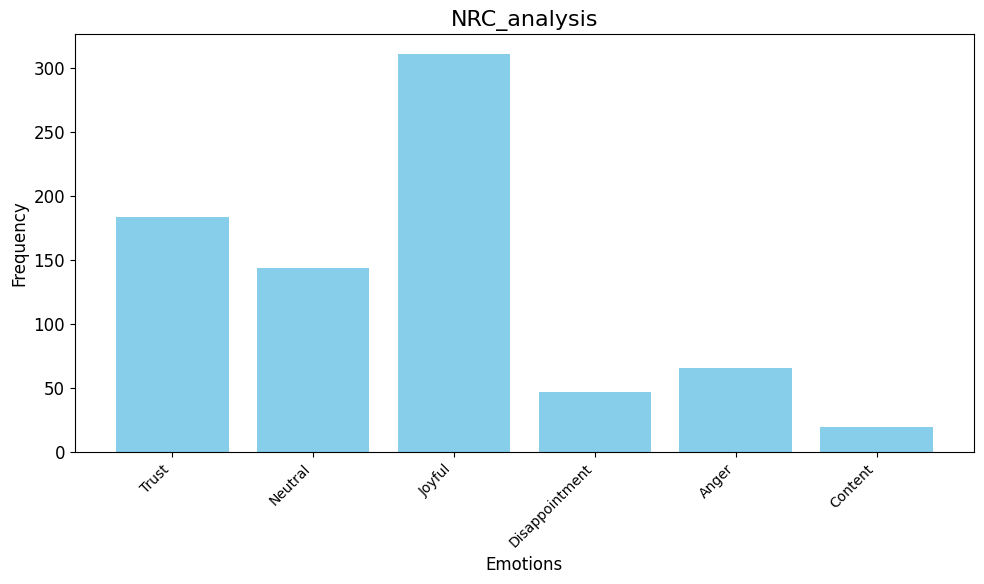

In [96]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 12})

# Convert to pandas Series
nrc_emotion_counts = pd.Series(nrc_emotion_counts)
Dbert_emotion_counts = pd.Series(Dbert_emotion_counts)

# Plot NRC Emotion Lexicon

# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['NRC_analysis'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Prepare data for the bar chart
emotions, counts = zip(*emotion_counts.items())
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts, color='skyblue')
plt.title('NRC_analysis', fontsize=16)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.tight_layout()
plt.show()



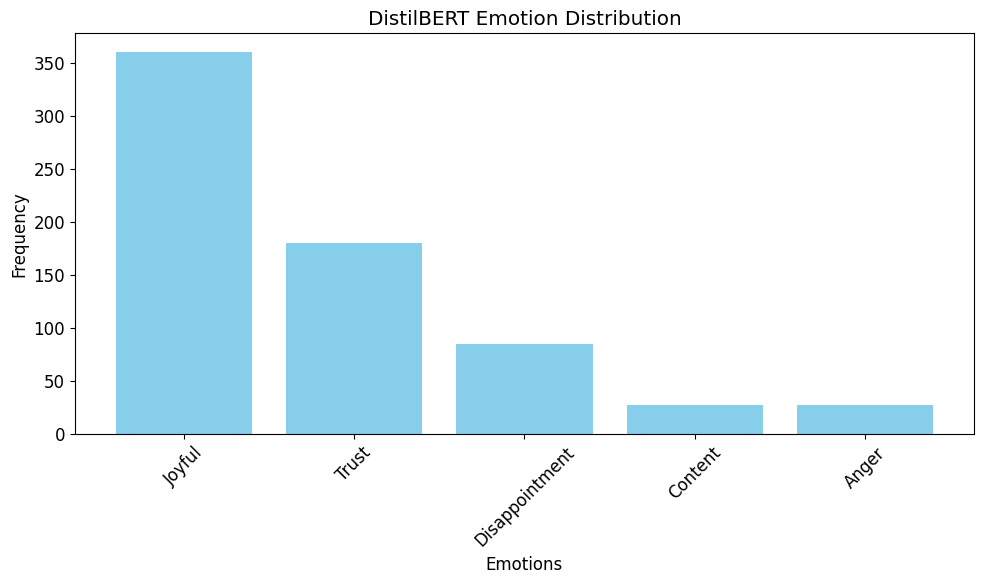

In [97]:
#for DistilBERT
# Flatten the `emotion_labels` column and count the occurrences of each emotion
all_emotions = [emotion for emotions in df['DistilBERT_emotion_labels'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Convert to lists for plotting
emotions, counts = zip(*emotion_counts.items())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts, color='skyblue')
plt.title('DistilBERT Emotion Distribution')
plt.ylabel('Frequency')
plt.xlabel('Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


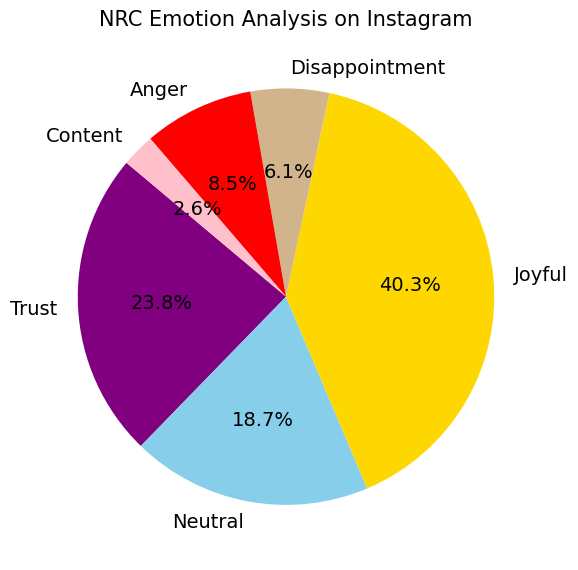

In [104]:

# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['NRC_analysis'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Custom colors
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown, tan
    'Anger': 'red'
}

 #Map colors to emotions
colors = [custom_colors[emotion] for emotion in emotions]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=emotions, autopct='%1.1f%%', startangle=140, colors= colors)
#plt.title('NRC Emotion Analysis on Instagram')
plt.title('NRC Emotion Analysis on Instagram', fontsize=15, fontweight='normal')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

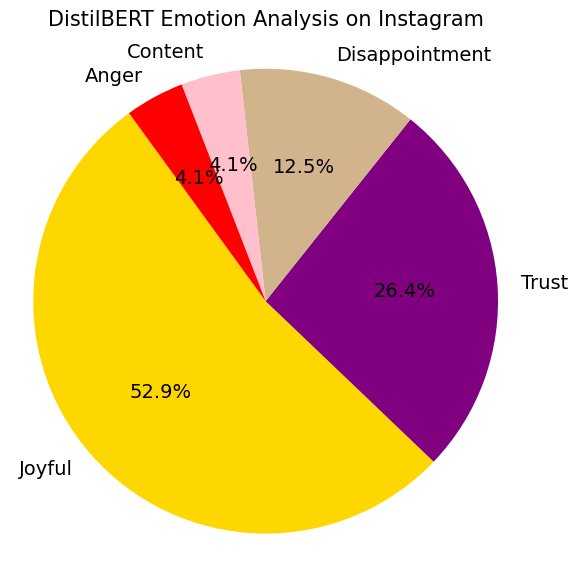

In [105]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 14})
# Plot pie chart for DistilBERT

all_emotions = [emotion for emotions in df['DistilBERT_emotion_labels'] for emotion in emotions]  
emotion_counts = Counter(all_emotions)


# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Custom colors
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown, tan
    'Anger': 'red'
}

 #Map colors to emotions
colors = [custom_colors[emotion] for emotion in emotions]


plt.figure(figsize=(6, 6))
plt.pie(counts, labels=emotions, autopct='%1.1f%%', startangle=126, colors= colors)
plt.title('DistilBERT Emotion Analysis on Instagram', fontsize=15, fontweight='normal')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [57]:
!pip install wordcloud

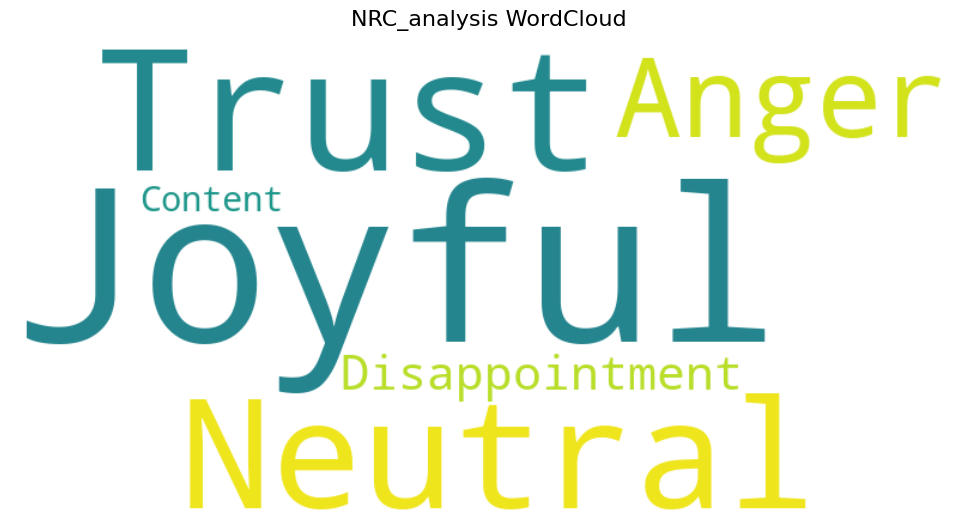

In [63]:
from wordcloud import WordCloud


# Generate word cloud for NRC
# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['NRC_analysis'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Generate the WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(emotion_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('NRC_analysis WordCloud', fontsize=16)
plt.tight_layout()
plt.show()


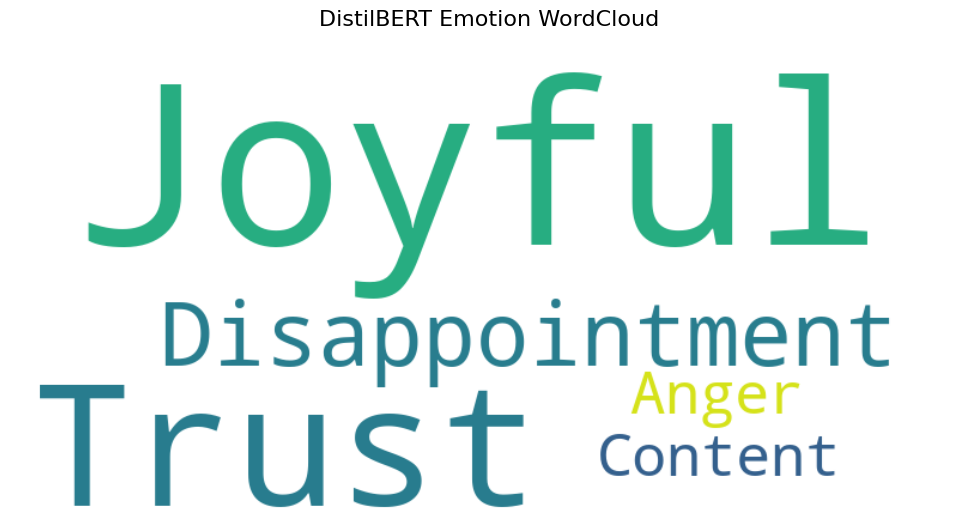

In [64]:
# Generate word cloud for DistilBERT
# Flatten the `emotion_labels` column to aggregate all emotions
all_emotions = [emotion for emotions in df['DistilBERT_emotion_labels'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Generate the WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(emotion_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('DistilBERT Emotion WordCloud', fontsize=16)
plt.tight_layout()
plt.show()

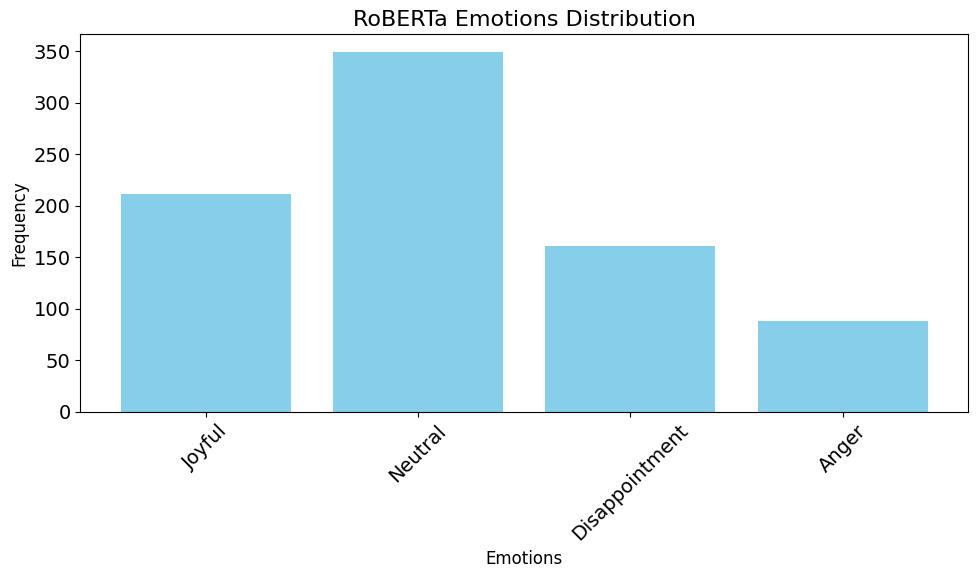

In [111]:
# Count the occurrences of each emotion
emotion_counts = df['RoBERTa_emotion'].value_counts()
polarity_counts = df['RoBERTa_polarity'].value_counts()

import matplotlib.pyplot as plt
from collections import Counter

# Flatten the `dominant_emotion` column to aggregate all emotions
all_emotions = [emotion for emotions in df['RoBERTa_emotion'] if isinstance(emotions, list) for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Flatten the `dominant_polarity` column
all_polarities = df['RoBERTa_polarity']
polarity_counts = Counter(all_polarities)

# Bar chart for emotions
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(),  color='skyblue')
plt.title('RoBERTa Emotions Distribution', fontsize=16)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


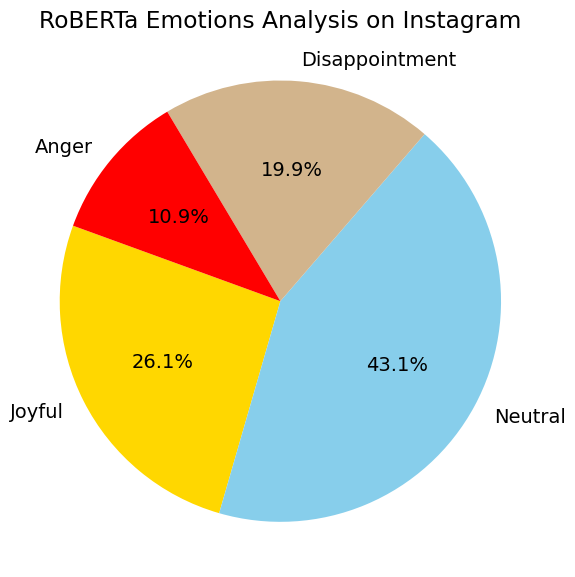

In [112]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 14})
# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Custom colors
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown, tan
    'Anger': 'red'
}

 #Map colors to emotions
colors = [custom_colors[emotion] for emotion in emotions]



# Pie chart for emotions
plt.figure(figsize=(6, 6))
plt.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=160, colors= colors)
plt.title('RoBERTa Emotions Analysis on Instagram')
plt.axis('equal')
plt.tight_layout()
plt.show()



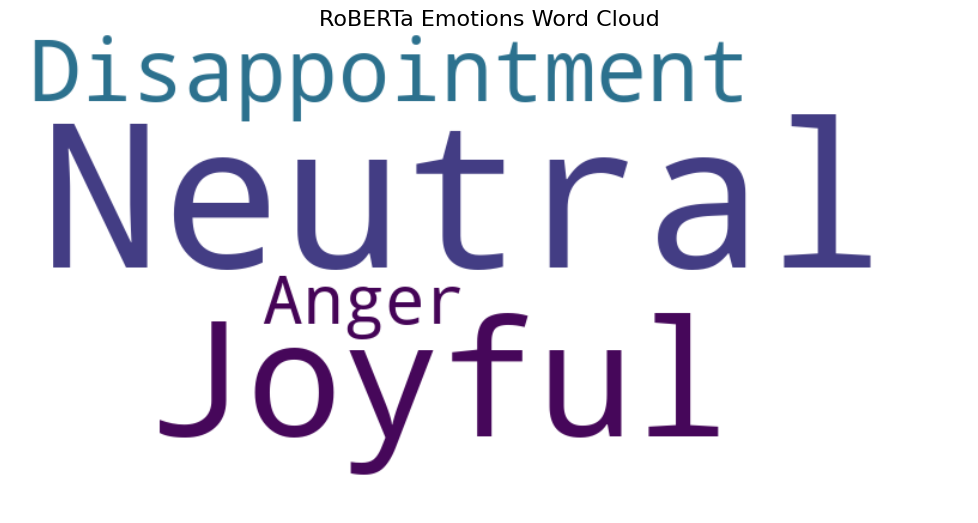

In [68]:
# Generate WordCloud for `dominant_emotion`

# WordCloud for emotions
emotion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_counts)

plt.figure(figsize=(10, 6))
plt.imshow(emotion_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('RoBERTa Emotions Word Cloud', fontsize=16)
plt.tight_layout()
plt.show()
